In [1]:
import pandas as pd
import mysql.connector
import os

# List of CSV files and their corresponding table names
csv_files = [
    ('customers.csv', 'customers'),
    ('orders.csv', 'orders'),
    ('geolocation.csv', 'geolocation'),
    ('products.csv', 'products'),
    ('order_items.csv', 'order_items'),  # Corrected name here
    ('payments.csv', 'payments'),
    ('sellers.csv', 'sellers')  # Added missing comma
]

# Connect to the MySQL database
conn = mysql.connector.connect(
    host='localhost',
    user='root',
    password='Amit2204',
    database='ecommerce'
)
cursor = conn.cursor()

# Folder containing the CSV files
folder_path = r'C:\Users\91995\Desktop\projects\Data analysis of sales data'  # Corrected the path

def get_sql_type(dtype):
    if pd.api.types.is_integer_dtype(dtype):
        return 'INT'
    elif pd.api.types.is_float_dtype(dtype):
        return 'FLOAT'
    elif pd.api.types.is_bool_dtype(dtype):
        return 'BOOLEAN'
    elif pd.api.types.is_datetime64_any_dtype(dtype):
        return 'DATETIME'
    else:
        return 'TEXT'

# Process each CSV file
for csv_file, table_name in csv_files:
    file_path = os.path.join(folder_path, csv_file)

    try:
        # Read the CSV file into a pandas DataFrame
        df = pd.read_csv(file_path)

        # Replace NaN with None to handle SQL NULL
        df = df.where(pd.notnull(df), None)

        # Debugging: Check for NaN values
        print(f"Processing {csv_file}")
        print(f"NaN values before replacement:\n{df.isnull().sum()}\n")

        # Clean column names
        df.columns = [col.replace(' ', '_').replace('-', '_').replace('.', '_') for col in df.columns]

        # Generate the CREATE TABLE statement with appropriate data types
        columns = ', '.join([f'`{col}` {get_sql_type(df[col].dtype)}' for col in df.columns])
        create_table_query = f'CREATE TABLE IF NOT EXISTS `{table_name}` ({columns})'
        cursor.execute(create_table_query)

        # Insert DataFrame data into the MySQL table
        rows = [tuple(None if pd.isna(x) else x for x in row) for _, row in df.iterrows()]
        sql = f"INSERT INTO `{table_name}` ({', '.join([f'`{col}`' for col in df.columns])}) VALUES ({', '.join(['%s'] * len(df.columns))})"
        cursor.executemany(sql, rows)

        # Commit the transaction for the current CSV file
        conn.commit()

    except Exception as e:
        print(f"Error processing {csv_file}: {e}")
        conn.rollback()  # Rollback in case of an error

# Close the connection
conn.close()


Processing customers.csv
NaN values before replacement:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Processing orders.csv
NaN values before replacement:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Processing geolocation.csv
NaN values before replacement:
geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

Error processing geolocation.csv: 2013 (HY000): Lost connection to MySQL server during query


MySQLInterfaceError: Lost connection to MySQL server during query

In [2]:
$ mysql --help | grep /my.cnf



SyntaxError: invalid syntax (1128790850.py, line 1)

In [3]:
import pandas as pd
import mysql.connector
import os

# List of CSV files and their corresponding table names
csv_files = [
    ('products.csv', 'products'),
    ('order_items.csv', 'order_items'),  # Corrected name here
    ('payments.csv', 'payments'),
    ('sellers.csv', 'sellers')  # Added missing comma
]

# Connect to the MySQL database
conn = mysql.connector.connect(
    host='localhost',
    user='root',
    password='Amit2204',
    database='ecommerce'
)
cursor = conn.cursor()

# Folder containing the CSV files
folder_path = r'C:\Users\91995\Desktop\projects\Data analysis of sales data'  # Corrected the path

def get_sql_type(dtype):
    if pd.api.types.is_integer_dtype(dtype):
        return 'INT'
    elif pd.api.types.is_float_dtype(dtype):
        return 'FLOAT'
    elif pd.api.types.is_bool_dtype(dtype):
        return 'BOOLEAN'
    elif pd.api.types.is_datetime64_any_dtype(dtype):
        return 'DATETIME'
    else:
        return 'TEXT'

# Process each CSV file
for csv_file, table_name in csv_files:
    file_path = os.path.join(folder_path, csv_file)

    try:
        # Read the CSV file into a pandas DataFrame
        df = pd.read_csv(file_path)

        # Replace NaN with None to handle SQL NULL
        df = df.where(pd.notnull(df), None)

        # Debugging: Check for NaN values
        print(f"Processing {csv_file}")
        print(f"NaN values before replacement:\n{df.isnull().sum()}\n")

        # Clean column names
        df.columns = [col.replace(' ', '_').replace('-', '_').replace('.', '_') for col in df.columns]

        # Generate the CREATE TABLE statement with appropriate data types
        columns = ', '.join([f'`{col}` {get_sql_type(df[col].dtype)}' for col in df.columns])
        create_table_query = f'CREATE TABLE IF NOT EXISTS `{table_name}` ({columns})'
        cursor.execute(create_table_query)

        # Insert DataFrame data into the MySQL table
        rows = [tuple(None if pd.isna(x) else x for x in row) for _, row in df.iterrows()]
        sql = f"INSERT INTO `{table_name}` ({', '.join([f'`{col}`' for col in df.columns])}) VALUES ({', '.join(['%s'] * len(df.columns))})"
        cursor.executemany(sql, rows)

        # Commit the transaction for the current CSV file
        conn.commit()

    except Exception as e:
        print(f"Error processing {csv_file}: {e}")
        conn.rollback()  # Rollback in case of an error

# Close the connection
conn.close()


Processing products.csv
NaN values before replacement:
product_id                      0
product category              610
product_name_length           610
product_description_length    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

Processing order_items.csv
NaN values before replacement:
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

Processing payments.csv
NaN values before replacement:
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

Processing sellers.csv
NaN values before replacement:
seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector 

db = mysql.connector.connect(host = "localhost",
                             username = "root", 
                              password = "Amit2204",
                              database = "ecommerce")

cur = db.cursor()

1. list all the unique cities where customers are located.


In [8]:
query = """SELECT distinct customer_city from customers"""

cur.execute(query)
data = cur.fetchall()

data

[('franca',),
 ('sao bernardo do campo',),
 ('sao paulo',),
 ('mogi das cruzes',),
 ('campinas',),
 ('jaragua do sul',),
 ('timoteo',),
 ('curitiba',),
 ('belo horizonte',),
 ('montes claros',),
 ('rio de janeiro',),
 ('lencois paulista',),
 ('caxias do sul',),
 ('piracicaba',),
 ('guarulhos',),
 ('pacaja',),
 ('florianopolis',),
 ('aparecida de goiania',),
 ('santo andre',),
 ('goiania',),
 ('cachoeiro de itapemirim',),
 ('sao jose dos campos',),
 ('sao roque',),
 ('camacari',),
 ('resende',),
 ('sumare',),
 ('novo hamburgo',),
 ('sao luis',),
 ('sao jose',),
 ('santa barbara',),
 ('ribeirao preto',),
 ('ituiutaba',),
 ('taquarituba',),
 ('sao jose dos pinhais',),
 ('barrinha',),
 ('parati',),
 ('dourados',),
 ('trindade',),
 ('cascavel',),
 ('fortaleza',),
 ('brasilia',),
 ('pelotas',),
 ('porto alegre',),
 ('salto',),
 ('jundiai',),
 ('cacapava',),
 ('sao vicente',),
 ('uberlandia',),
 ('botelhos',),
 ('sao goncalo',),
 ('araucaria',),
 ('nova iguacu',),
 ('areia branca',),
 ('campo

count the number of orders placed in 2017

In [10]:
query = """SELECT count(order_id) from orders where year(order_purchase_timestamp) = 2017"""

cur.execute(query)
data = cur.fetchall()

"total orders placed in 2017 are", data[0][0]


('total orders placed in 2017 are', 45101)

find the totla sales per category

In [17]:
query = """SELECT 
    products.product_category AS category,
    ROUND(SUM(payments.payment_value), 2) AS sales
FROM
    products
        JOIN
    order_items ON products.product_id = order_items.product_id
        JOIN
    payments ON payments.order_id = order_items.order_id
GROUP BY category"""

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns= ["category", "sales"])
df

,category,sales
0,perfumery,506738.66
1,Furniture Decoration,1430176.39
2,telephony,486882.05
3,bed table bath,1712553.67
4,automotive,852294.33
...,...,...
69,cds music dvds,1199.43
70,La Cuisine,2913.53
71,Fashion Children's Clothing,785.67
72,PC Gamer,2174.43


calculate the percentage of orders that were paid in installments 

In [20]:
query = """ SELECT 
    (SUM(CASE
        WHEN payment_installments >= 1 THEN 1
        ELSE 0
    END)) / COUNT(*) * 100
FROM
    payments """

cur.execute(query)
data = cur.fetchall()
("the percentage of orders that were paid in installments is"), data[0][0]

('the percentage of orders that were paid in installments is',
 Decimal('99.9981'))

count the number of customer from each states. 

,state,total customers
0,SP,41746
4,RJ,12852
2,MG,11635
5,RS,5466
3,PR,5045
1,SC,3637
9,BA,3380
13,DF,2140
8,ES,2033
7,GO,2020


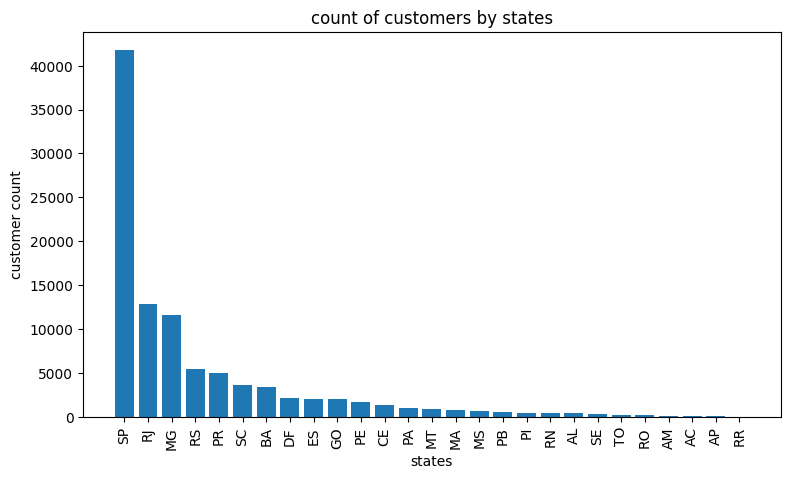

In [41]:
query = """ SELECT 
    customer_state, COUNT(customer_id)
FROM
    customers
GROUP BY customer_state"""

cur.execute(query)
data = cur.fetchall()
("count of the number of customer from each states"), data

df = pd.DataFrame(data, columns= ["state","total customers"])
df = df.sort_values(by  = "total customers", ascending = False)

plt.figure(figsize=(9,5))
plt.bar(df["state"], df["total customers"])
plt.xlabel("states")
plt.ylabel("customer count")
plt.title("count of customers by states")
plt.xticks(rotation = 90)
df 



advanced question 

1. calculate the number of orders per month in 2018


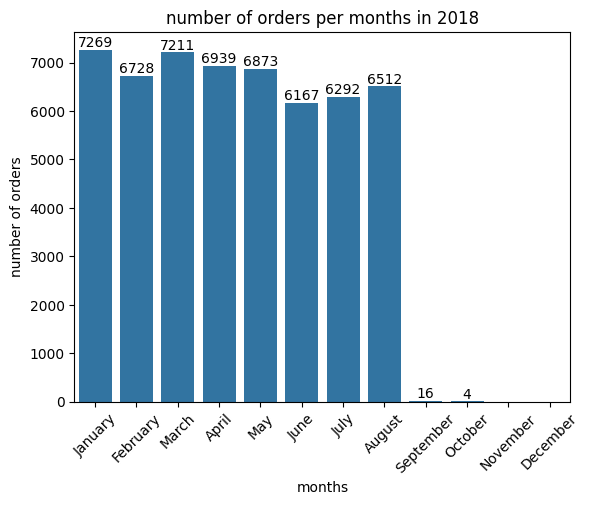

,months,order count
0,July,6292
1,August,6512
2,February,6728
3,June,6167
4,March,7211
5,January,7269
6,May,6873
7,April,6939
8,September,16
9,October,4


In [43]:
query = """ SELECT 
    DATE_FORMAT(order_purchase_timestamp, '%M') AS months, 
    COUNT(order_id) AS order_count 
FROM orders 
WHERE YEAR(order_purchase_timestamp) = 2018 
GROUP BY months;
"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["months", "order count"])
o = ["January", "February", "March", "April", "May", "June","July", "August", "September", "October", "November", "December"]

ax = sns.barplot(x = df["months"], y = df["order count"], data = df, order = o)
plt.xticks(rotation = 45)
ax.bar_label(ax.containers[0])
plt.xlabel("months")
plt.ylabel("number of orders")
plt.title("number of orders per months in 2018")
plt.show()
df 


find the average number of products per order, grouped by customer city. 

In [49]:
query = """ SELECT 
    customers.customer_city, 
    ROUND(AVG(oc), 2) AS average_orders
FROM 
    (
        SELECT 
            orders.order_id, 
            orders.customer_id, 
            COUNT(order_items.order_id) AS oc
        FROM 
            orders 
        JOIN 
            order_items ON orders.order_id = order_items.order_id
        GROUP BY 
            orders.order_id, orders.customer_id
    ) AS count_per_order
JOIN 
    customers ON customers.customer_id = count_per_order.customer_id
GROUP BY 
    customers.customer_city order by average_orders desc;

"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["customer city", "avg orders"])
df


,customer city,avg orders
0,padre carvalho,7.00
1,celso ramos,6.50
2,datas,6.00
3,candido godoi,6.00
4,matias olimpio,5.00
...,...,...
4105,lagoa da canoa,1.00
4106,japaratuba,1.00
4107,sebastiao leal,1.00
4108,morro agudo de goias,1.00


question 3: 

calculate the percetage of total revenue of total revenue contributed by each product category

In [8]:
import mysql.connector
import pandas as pd

# Establish connection to the MySQL database
connection = mysql.connector.connect(
    host="localhost",
    user="root",
    password="Amit2204",
    database="ecommerce"
)

# Create a cursor object to execute queries
cur = connection.cursor()

# Your query
query = """ 
SELECT 
    UPPER(products.product_category) AS category, 
    ROUND((SUM(payments.payment_value) / 
           (SELECT SUM(payment_value) FROM payments)) * 100, 2) AS sales_percentage
FROM 
    products 
JOIN 
    order_items ON products.product_id = order_items.product_id
JOIN 
    payments ON payments.order_id = order_items.order_id
GROUP BY 
    category 
ORDER BY 
    sales_percentage DESC;
"""

# Execute the query
cur.execute(query)

# Fetch the data
data = cur.fetchall()

# Create a DataFrame
df = pd.DataFrame(data, columns=["category", "percentage of distributions"])
# Close the cursor and connection
cur.close()
connection.close()

#print
df.head(10)



,category,percentage of distributions
0,BED TABLE BATH,42.79
1,HEALTH BEAUTY,41.41
2,COMPUTER ACCESSORIES,39.61
3,FURNITURE DECORATION,35.73
4,WATCHES PRESENT,35.71
5,SPORT LEISURE,34.78
6,HOUSEWARES,27.35
7,AUTOMOTIVE,21.30
8,GARDEN TOOLS,20.95
9,COOL STUFF,19.48


identify the correlation between product price and the number of times a product has been purchased


In [20]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

# Establish connection to the MySQL database
connection = mysql.connector.connect(
    host="localhost",
    user="root",
    password="Amit2204",
    database="ecommerce"
)

# Create a cursor object to execute queries
cur = connection.cursor()

query = """ 
SELECT 
    products.product_category, 
    COUNT(order_items.product_id), 
    ROUND(AVG(order_items.price), 2)
FROM 
    products 
JOIN 
    order_items 
ON 
    products.product_id = order_items.product_id
GROUP BY 
    products.product_category;
"""

# Execute the query
cur.execute(query)

# Fetch the data
data = cur.fetchall()

# Convert the data into a DataFrame
df = pd.DataFrame(data, columns=["category", "order_count", "price"])

# Close the cursor and connection
cur.close()
connection.close()

# Extract the columns for correlation
arr1 = df["order_count"]
arr2 = df["price"]

# Calculate correlation coefficient
correlation_matrix = np.corrcoef(arr1, arr2)
correlation = correlation_matrix[0, -1]

print("The correlation between price and number of times a product has been purchased is:", correlation)
df

The correlation between price and number of times a product has been purchased is: -0.10631514167157562


,category,order_count,price
0,HEALTH BEAUTY,38680,130.16
1,sport leisure,34564,114.34
2,Cool Stuff,15184,167.36
3,computer accessories,31308,116.51
4,Watches present,23964,201.14
...,...,...,...
69,flowers,132,33.64
70,Kitchen portable and food coach,60,264.57
71,CITTE AND UPHACK FURNITURE,152,114.95
72,House Comfort 2,120,25.34


Calculate the total revenue generated by each seller, and rank them by revenue.


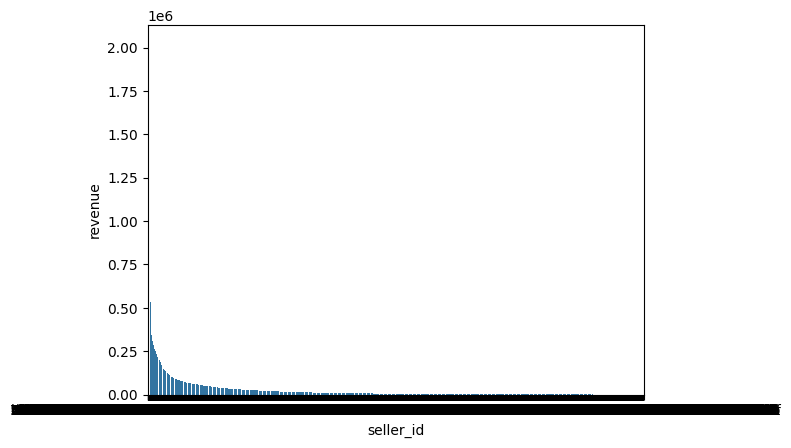

In [29]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

# Establish connection to the MySQL database
connection = mysql.connector.connect(
    host="localhost",
    user="root",
    password="Amit2204",
    database="ecommerce"
)

# Create a cursor object to execute queries
cur = connection.cursor()

query = """ SELECT *, 
       DENSE_RANK() OVER (ORDER BY revenue DESC) AS rn 
FROM (
    SELECT order_items.seller_id, 
           SUM(payments.payment_value) AS revenue 
    FROM order_items 
    JOIN payments ON order_items.order_id = payments.order_id
    GROUP BY order_items.seller_id
) AS a;

"""

# Execute the query
cur.execute(query)

# Fetch the data
data = cur.fetchall()

# Convert the data into a DataFrame
df = pd.DataFrame(data, columns=["seller_id", "revenue", "price"])
df.head(10)

# Close the cursor and connection
cur.close()
connection.close()
sns.barplot(x = "seller_id", y = "revenue", data  = df)
plt.show()



Calculate the moving average of order values for each customer over their order history.


In [33]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

# Establish connection to the MySQL database
connection = mysql.connector.connect(
    host="localhost",
    user="root",
    password="Amit2204",
    database="ecommerce"
)

# Create a cursor object to execute queries
cur = connection.cursor()

query = """ 
SELECT 
    customer_id, 
    order_purchase_timestamp, 
    payment, 
    AVG(payment) OVER (PARTITION BY customer_id 
                       ORDER BY order_purchase_timestamp
                       ROWS BETWEEN 2 PRECEDING AND CURRENT ROW) AS mov_avg
FROM 
    (SELECT 
        orders.customer_id, 
        orders.order_purchase_timestamp, 
        payments.payment_value AS payment
     FROM 
        payments 
     JOIN 
        orders 
     ON payments.order_id = orders.order_id) AS a;

"""

# Execute the query
cur.execute(query)

# Fetch the data
data = cur.fetchall()

# Convert the data into a DataFrame
df = pd.DataFrame(data, columns=["customer_id", "time_stamps", "price", "moving_avg"])

# Close the cursor and connection
cur.close()
connection.close()
df.head(10)


,customer_id,time_stamps,price,moving_avg
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
1,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
2,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,67.41,67.410004
3,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,67.41,67.410004
4,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,195.42,195.419998
5,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,195.42,195.419998
6,0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:20,179.35,179.350006
7,0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:20,179.35,179.350006
8,000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:17,107.01,107.010002
9,000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:17,107.01,107.010002


Calculate the cumulative sales per month for each year.


In [34]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

# Establish connection to the MySQL database
connection = mysql.connector.connect(
    host="localhost",
    user="root",
    password="Amit2204",
    database="ecommerce"
)

# Create a cursor object to execute queries
cur = connection.cursor()

query = """ SELECT 
    years, 
    months, 
    payment, 
    SUM(payment) OVER (ORDER BY years, months) AS cumulative_sales
FROM 
    (SELECT 
        YEAR(orders.order_purchase_timestamp) AS years, 
        MONTH(orders.order_purchase_timestamp) AS months, 
        ROUND(SUM(payments.payment_value), 2) AS payment
     FROM 
        orders 
     JOIN 
        payments ON orders.order_id = payments.order_id
     GROUP BY 
        years, months) AS a;


"""

# Execute the query
cur.execute(query)

# Fetch the data
data = cur.fetchall()

# Convert the data into a DataFrame
df = pd.DataFrame(data, columns=["years", "months", "payment", "cumulative_sales"])

# Close the cursor and connection
cur.close()
connection.close()
df.head(10)


,years,months,payment,cumulative_sales
0,2016,9,504.48,504.48
1,2016,10,118180.96,118685.44
2,2016,12,39.24,118724.68
3,2017,1,276976.08,395700.76
4,2017,2,583816.02,979516.78
5,2017,3,899727.20,1879243.98
6,2017,4,835576.06,2714820.04
7,2017,5,1185837.64,3900657.68
8,2017,6,1022552.76,4923210.44
9,2017,7,1184765.84,6107976.28


Calculate the year-over-year growth rate of total sales.


In [36]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

# Establish connection to the MySQL database
connection = mysql.connector.connect(
    host="localhost",
    user="root",
    password="Amit2204",
    database="ecommerce"
)

# Create a cursor object to execute queries
cur = connection.cursor()

query = """  
WITH a AS (
    SELECT 
        YEAR(orders.order_purchase_timestamp) AS years, 
        ROUND(SUM(payments.payment_value), 2) AS payment 
    FROM 
        orders 
    JOIN 
        payments 
    ON 
        orders.order_id = payments.order_id
    GROUP BY 
        years
)
SELECT 
    years, 
    ((payment - LAG(payment, 1) OVER (ORDER BY years)) / 
    LAG(payment, 1) OVER (ORDER BY years)) * 100 AS percentage_change
FROM 
    a;

"""

# Execute the query
cur.execute(query)

# Fetch the data
data = cur.fetchall()

# Convert the data into a DataFrame
df = pd.DataFrame(data, columns=["years", "yoy %age growth"])

# Close the cursor and connection
cur.close()
connection.close()
df


,years,yoy %age growth
0,2016,NaN
1,2017,12112.703761
2,2018,20.000924


Calculate the retention rate of customers, defined as the percentage of customers who make another purchase within 6 months of their first purchase.


In [39]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

# Establish connection to the MySQL database
connection = mysql.connector.connect(
    host="localhost",
    user="root",
    password="Amit2204",
    database="ecommerce"
)

# Create a cursor object to execute queries
cur = connection.cursor()

query = """  
   WITH a AS (
    SELECT 
        customers.customer_id, 
        MIN(orders.order_purchase_timestamp) AS first_order
    FROM 
        customers 
    JOIN 
        orders 
    ON 
        customers.customer_id = orders.customer_id
    GROUP BY 
        customers.customer_id
), 

b AS (
    SELECT 
        a.customer_id, 
        COUNT(DISTINCT orders.order_purchase_timestamp) AS next_order
    FROM 
        a 
    JOIN 
        orders 
    ON 
        orders.customer_id = a.customer_id
        AND orders.order_purchase_timestamp > a.first_order
        AND orders.order_purchase_timestamp < DATE_ADD(a.first_order, INTERVAL 6 MONTH)
    GROUP BY 
        a.customer_id
)

SELECT 
    100 * (COUNT(DISTINCT b.customer_id) / COUNT(DISTINCT a.customer_id)) AS percentage
FROM 
    a 
LEFT JOIN 
    b 
ON 
    a.customer_id = b.customer_id;

"""

# Execute the query
cur.execute(query)

# Fetch the data
data = cur.fetchall()

# Convert the data into a DataFrame
df = pd.DataFrame(data)

# Close the cursor and connection
cur.close()
connection.close()
df


,0
0,0.0000


Identify the top 3 customers who spent the most money in each year.

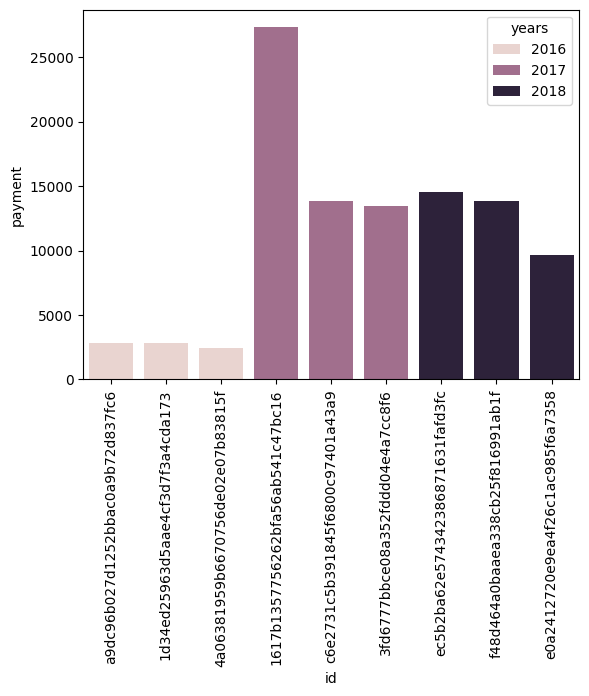

In [44]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

# Establish connection to the MySQL database
connection = mysql.connector.connect(
    host="localhost",
    user="root",
    password="Amit2204",
    database="ecommerce"
)

# Create a cursor object to execute queries
cur = connection.cursor()

query = """ SELECT 
    years, 
    customer_id, 
    payment, 
    d_rank
FROM (
    SELECT 
        YEAR(orders.order_purchase_timestamp) AS years, 
        orders.customer_id, 
        SUM(payments.payment_value) AS payment, 
        DENSE_RANK() OVER (
            PARTITION BY YEAR(orders.order_purchase_timestamp) 
            ORDER BY SUM(payments.payment_value) DESC
        ) AS d_rank
    FROM 
        orders 
    JOIN 
        payments 
    ON 
        payments.order_id = orders.order_id
    GROUP BY 
        YEAR(orders.order_purchase_timestamp), 
        orders.customer_id
) AS a
WHERE 
    d_rank <= 3;


"""

# Execute the query
cur.execute(query)

# Fetch the data
data = cur.fetchall()

# Convert the data into a DataFrame
df = pd.DataFrame(data, columns= ["years", "id", "payment", "rank"])

# Close the cursor and connection
cur.close()
connection.close()
df
sns.barplot(x = "id", y = "payment", data = df, hue = "years")
plt.xticks(rotation = 90)
plt.show()
